In [1]:
import TDAimgprocess as TIP # topological image modification and processing
import os # os independent path construction 
import time # tracking computation time
import random # setting seeds
import numpy as np # handling arrays and general math
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # handling images\
from matplotlib.pyplot import imsave
import PIL # imaging library\
from skimage.segmentation import chan_vese # chan_vese segmentation
from skimage.segmentation import slic # k-means clustering based oversegmentation
from skimage.filters import roberts # Roberts' cross operator for edge detection
from skimage.morphology import convex_hull_image # construct convex hull of a binary image
import skimage.filters as filters # infer ISODATA thresholds from images
from skimage.segmentation import active_contour # active contour segmentation 
import cv2 # binarize images\

%matplotlib inline

f:\anaconda\envs\pytorch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\anaconda\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
f:\anaconda\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


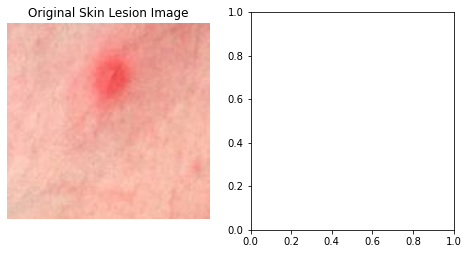

In [2]:
img = mpimg.imread( "input/QZ3.jpg")
# sgm_truth = mpimg.imread("acne_mask.jpg")

# img = mpimg.imread( "ISIC_0000012.jpg")
# sgm_truth = mpimg.imread("ISIC_0000012_segmentation.png")


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.flatten()

ax[0].imshow(img)
ax[0].set_axis_off()
ax[0].set_title("Original Skin Lesion Image", fontsize=12)

# ax[1].imshow(sgm_truth, cmap="gray")
# ax[1].set_axis_off()
# ax[1].set_title("Ground Truth Segmentation", fontsize=12)

plt.show()

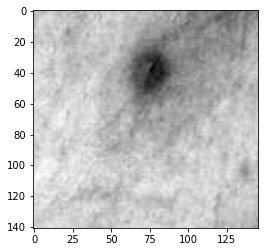

In [3]:
random.seed(42)

img_gray = np.asarray(PIL.Image.fromarray((img).astype(np.uint8)).convert("L")).copy().astype("float") # grayscale
img_gray += 0.01 * np.random.randn(*img_gray.shape) # random noise

plt.imshow(img_gray, cmap="gray")

In [8]:
# window_size = 25
# border_width = 25

window_size = 3
border_width = 3

start_time = time.time()
TIP_img = TIP.topological_process_img(img_gray, window_size=window_size, border_width=border_width)
elapsed_time = time.time() - start_time
print("Time for Topological Image Processing: " + time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time for Topological Image Processing: 00:00:00


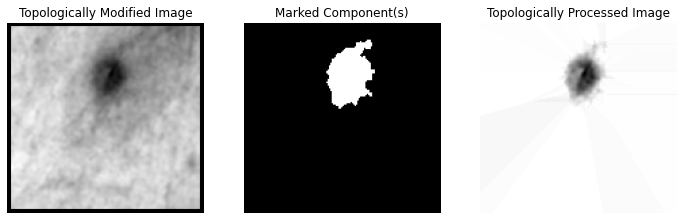

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.flatten()

ax[0].imshow(TIP_img["modified"], cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Topologically Modified Image", fontsize=12)

ax[1].imshow(TIP_img["components"], cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("Marked Component(s)", fontsize=12)


ax[2].imshow(TIP_img["processed"], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Topologically Processed Image", fontsize=12)

imsave("components.png", TIP_img["components"], cmap="gray")
imsave("processed.png", TIP_img["processed"], cmap="gray")

plt.show()